In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AKSHAIYA/Datasets/main/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [12]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)


In [14]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [16]:
df["region"].replace({
    'southeast': 3,
    'southwest': 4,
    'northeast': 1,
    'northwest': 0
}, inplace=True)

In [17]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [18]:
df["sex"].replace({
    'male': 0,
    'female': 1
}, inplace=True)

In [20]:
df['smoker'].value_counts()
df["smoker"].replace({
    'no': 1,
    'yes': 0
}, inplace=True)

In [21]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,4,16884.92
1,18,0,33.8,1,1,3,1725.55
2,28,0,33.0,3,1,3,4449.46
3,33,0,22.7,0,1,0,21984.47
4,32,0,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,0,10600.55
1334,18,1,31.9,0,1,1,2205.98
1335,18,1,36.9,0,1,3,1629.83
1336,21,1,25.8,0,1,4,2007.95


In [23]:
numerical_data = df.select_dtypes(include=np.number)

In [24]:
numerical_data

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,4,16884.92
1,18,0,33.8,1,1,3,1725.55
2,28,0,33.0,3,1,3,4449.46
3,33,0,22.7,0,1,0,21984.47
4,32,0,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,0,10600.55
1334,18,1,31.9,0,1,1,2205.98
1335,18,1,36.9,0,1,3,1629.83
1336,21,1,25.8,0,1,4,2007.95


In [25]:
categorical_data = df.select_dtypes(exclude=np.number)

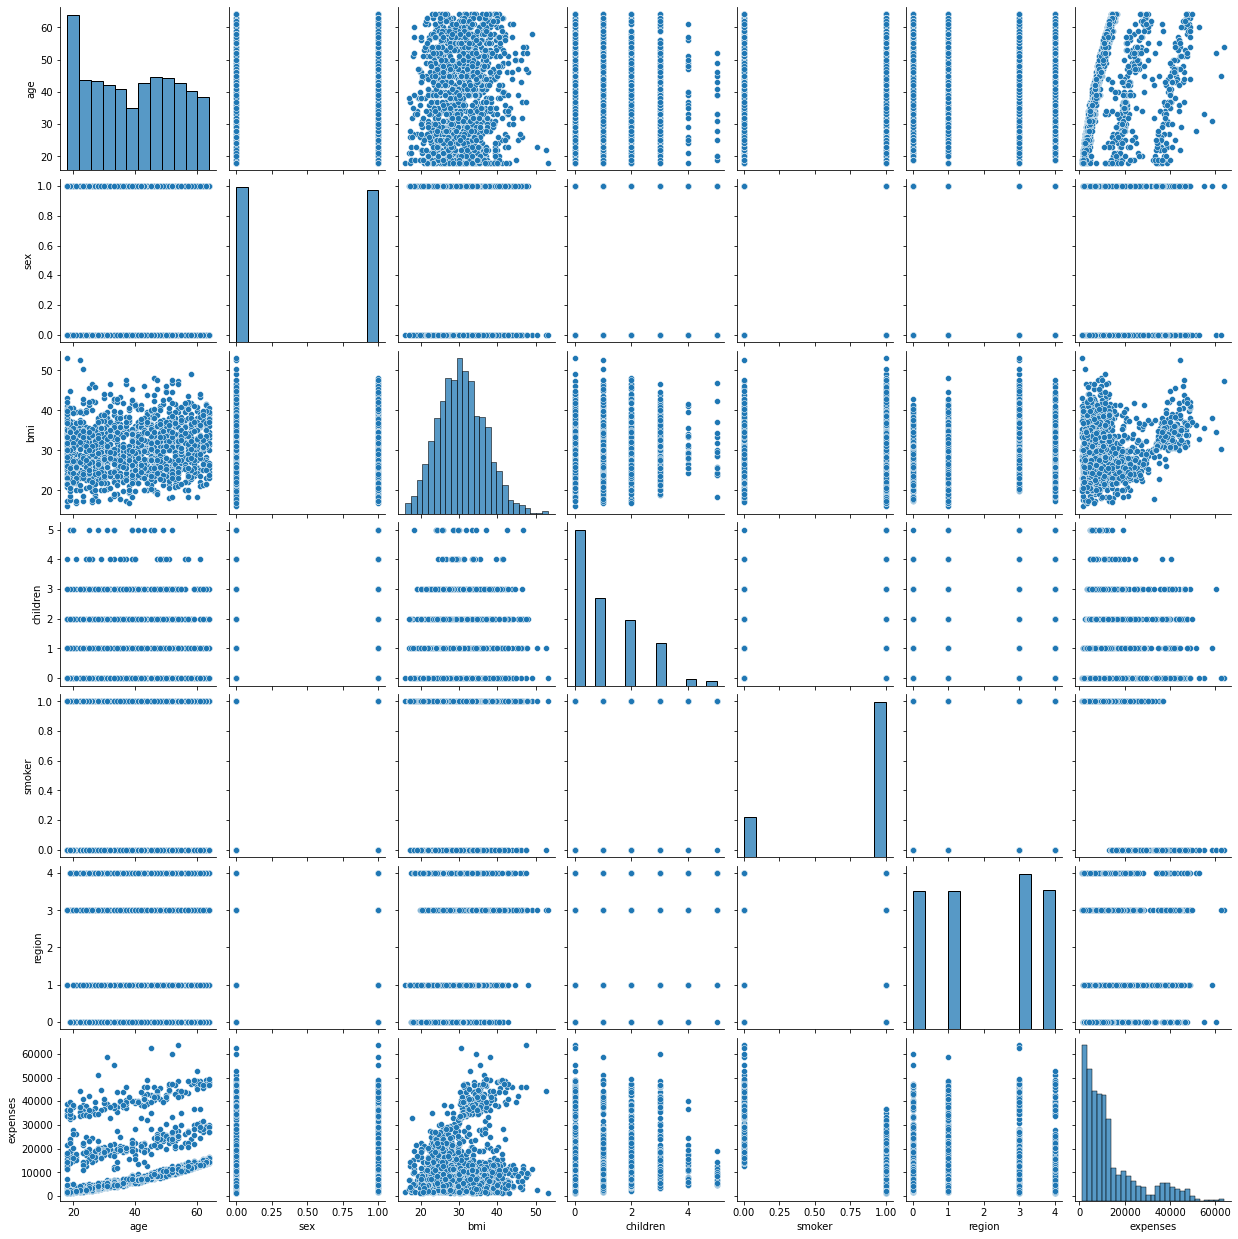

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.109414,0.041536,0.025587,0.000329,0.298308
sex,0.019814,1.000000,-0.046405,-0.017848,0.076596,-0.010307,-0.058045
bmi,0.109414,-0.046405,1.000000,0.012641,-0.003964,0.185469,0.198637
children,0.041536,-0.017848,0.012641,1.000000,-0.007331,-0.002781,0.067389
smoker,0.025587,0.076596,-0.003964,-0.007331,1.000000,-0.018202,-0.787234
region,0.000329,-0.010307,0.185469,-0.002781,-0.018202,1.000000,0.016547
expenses,0.298308,-0.058045,0.198637,0.067389,-0.787234,0.016547,1.000000


<AxesSubplot:>

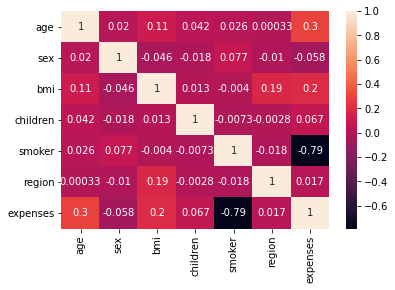

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
X = df.drop(columns="expenses")

In [34]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.817884
1       sex   1.940074
2       bmi  11.588092
3  children   1.799707
4    smoker   4.453058
5    region   2.762843


In [99]:
X = df.drop(columns=["expenses","sex","region"])

In [100]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.751741
1       bmi  9.737135
2  children  1.799619
3    smoker  4.369873


In [101]:
y = df["expenses"]

In [102]:
model = LinearRegression()

In [103]:
model.fit(X,y)

LinearRegression()

In [104]:
model.coef_

array([   257.75682741,    321.95831983,    473.16384167, -23809.31420992])

In [105]:
model.intercept_

11707.783737183687

In [106]:
y_pred = model.predict(X)

In [107]:
y_pred

array([25587.80058111,  3893.44747243,  7159.77677397, ...,
        4418.35442223,  1617.88755436, 36799.937316  ])

In [108]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100


In [109]:
linear_best_fit(X,y)

MSE :  36704886.8414821
MAE :  4181.0867416370875
RMSE :  6058.45581328131
MAPE :  42.38599803682991


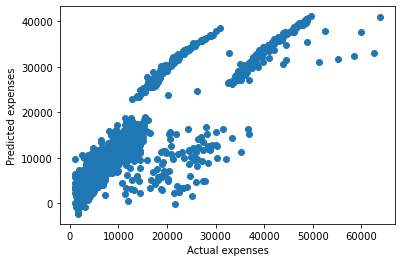

In [110]:
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")

plt.scatter(y, y_pred)

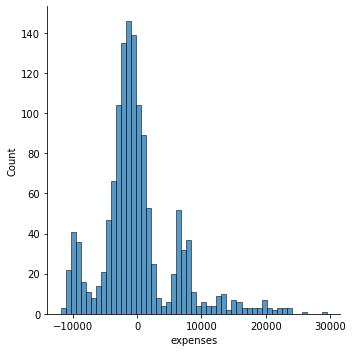

In [111]:
error = y-y_pred
sns.displot(error)

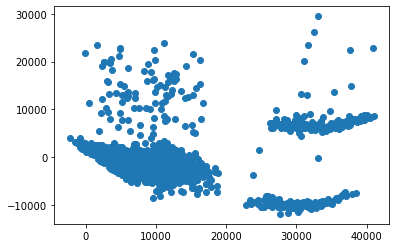

In [112]:
error = y-y_pred
plt.scatter( y_pred, error)

In [113]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [114]:
X_train.head()

,age,bmi,children,smoker
589,38,30.7,1,1
261,20,26.8,1,0
744,50,26.4,0,1
1293,46,25.7,3,1
1294,58,25.2,0,1


In [115]:
y_train

589      5976.83
261     17085.27
744      8827.21
1293     9301.89
1294    11931.13
          ...   
570      3761.29
452      1969.61
680      2585.27
672      4399.73
670      4837.58
Name: expenses, Length: 935, dtype: float64

In [116]:
y_test

1247     6059.17
810      9414.92
164      5028.15
405     11396.90
638     20149.32
          ...   
154      7077.19
1229    11938.26
1136     7623.52
518      5240.77
318      7421.19
Name: expenses, Length: 402, dtype: float64

In [117]:
kf = KFold(n_splits=10)

In [118]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    test_result.append(test_mape)

Train MAPE =  6067.082102422544
Test MAPE =  5986.973559282415
Train MAPE =  6045.781557365938
Test MAPE =  6177.236893192577
Train MAPE =  6062.293437916717
Test MAPE =  6029.501394047281
Train MAPE =  6036.883846854314
Test MAPE =  6273.402166006893
Train MAPE =  6037.066964974705
Test MAPE =  6267.059517761876
Train MAPE =  6153.592514892993
Test MAPE =  5145.762318663893
Train MAPE =  6108.709218741276
Test MAPE =  5590.370922159634
Train MAPE =  5949.105733287497
Test MAPE =  6982.965937544975
Train MAPE =  6088.701454154142
Test MAPE =  5791.788006463991
Train MAPE =  6020.531344103638
Test MAPE =  6406.115882241166


In [119]:
np.mean(test_result)

6065.11765973647

In [120]:
np.std(test_result)

469.90868762848453

In [121]:
(6065.11765973647 - 469.90868762848453),(6065.11765973647 + 469.90868762848453 )

(5595.208972107986, 6535.026347364955)

In [122]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6065.11765973647

In [123]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [124]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
train_pred = model.predict(X_train)

In [127]:
test_pred = model.predict(X_test)

In [128]:
np.sqrt(mean_squared_error(y_train, train_pred))

6015.564809321192

In [129]:
np.sqrt(mean_squared_error(y_test, test_pred))

6168.974347580331

In [131]:
((6168.974347580331-6015.564809321192)/6168.974347580331)*100

2.4867916385372992

In [132]:
r2 = r2_score(y_train, train_pred)

In [133]:
r2

0.7410901122803124

In [134]:
X_train.shape

(935, 4)

In [135]:
n, p = X_train.shape[0], X_train.shape[1]

In [136]:
adjr2 = 1-(((1-r2)*(n-1))/(n-p-1))

In [137]:
adjr2

0.739976521365389